# 2. EDA

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import os

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ROOT = Path(os.path.abspath('')).resolve().parents[0]
DATA = ROOT / "data"
INTERIM_DATA = DATA / "interim"

In [3]:
trx = pd.read_parquet(INTERIM_DATA/"transactions.parquet.gzip")

In [4]:
trx.head()

,customer_id,tx_datetime,tx_amount,sector_id,tx_fraud,tx_amount_log,ones,day_of_week,hour,month,is_month_start,is_month_end,is_weekend
0,0,2023-01-07 15:47:39,538.021174,4,0,6.289755,1,5,15,1,0,0,1
1,0,2023-01-07 18:43:44,713.726474,4,1,6.571900,1,5,18,1,0,0,1
2,0,2023-01-10 04:38:48,601.959471,4,0,6.401850,1,1,4,1,0,0,0
3,0,2023-01-10 05:55:56,608.692193,4,0,6.412954,1,1,5,1,0,0,0
4,0,2023-01-10 14:20:06,617.170620,4,0,6.426765,1,1,14,1,0,0,0


In [5]:
trx[trx['tx_fraud'] == 1]

,customer_id,tx_datetime,tx_amount,sector_id,tx_fraud,tx_amount_log,ones,day_of_week,hour,month,is_month_start,is_month_end,is_weekend
1,0,2023-01-07 18:43:44,713.726474,4,1,6.571900,1,5,18,1,0,0,1
215,0,2023-06-02 08:58:13,695.183602,4,1,6.545613,1,4,8,6,0,0,0
760,3,2023-01-12 11:06:22,625.092862,0,1,6.439499,1,3,11,1,0,0,0
832,3,2023-02-25 10:37:59,311.829793,0,1,5.745659,1,5,10,2,0,0,1
833,3,2023-02-25 10:40:19,284.229508,0,1,5.653294,1,5,10,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229531,4998,2023-02-17 03:54:46,690.550438,11,1,6.538936,1,4,3,2,0,0,0
1229664,4998,2023-05-23 14:03:44,669.501277,11,1,6.508026,1,1,14,5,0,0,0
1229830,4999,2023-04-28 15:22:03,372.309391,0,1,5.922408,1,4,15,4,0,0,0
1229831,4999,2023-04-28 15:22:28,346.204582,0,1,5.849914,1,4,15,4,0,0,0


In [6]:
trx['sector_id'].unique()


array([ 4,  1,  7,  0,  6, 17,  9, 10,  8,  3,  5,  2, 15, 11, 14, 16, 18,
       12, 13, 19])

In [7]:
trx[(trx['tx_fraud'] == 1)]['sector_id'].value_counts()

sector_id
16    257
13    229
0     204
11    199
14    198
15    190
2     188
18    188
7     186
10    183
9     182
12    182
6     178
3     177
1     177
19    176
8     176
5     175
17    173
4     161
Name: count, dtype: int64

/var/folders/v0/8r5h4ym13fb_mzmqc1hfkt580000gn/T/ipykernel_82160/2008505879.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(fraud_by_sector.value_counts(), palette='tab20')


<Axes: xlabel='sector_id', ylabel='count'>

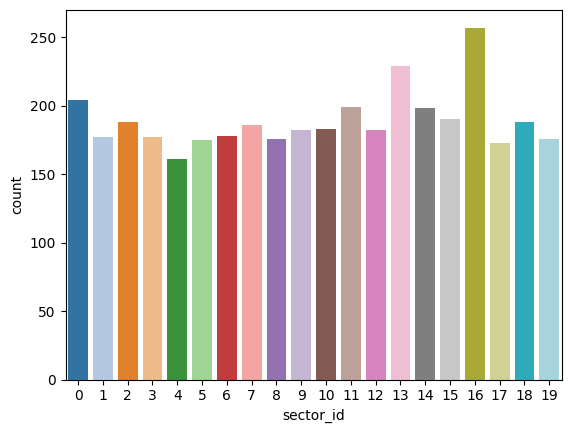

In [8]:
fraud_by_sector = trx[(trx['tx_fraud'] == 1)]['sector_id']
sns.barplot(fraud_by_sector.value_counts(), palette='tab20')

In [9]:
fraud_trx = trx[(trx['tx_fraud'] == 1)]

In [10]:
fraud_trx[fraud_trx['sector_id'] == 16]

,customer_id,tx_datetime,tx_amount,sector_id,tx_fraud,tx_amount_log,ones,day_of_week,hour,month,is_month_start,is_month_end,is_weekend
6439,26,2023-05-25 16:49:46,993.825861,16,1,6.902568,1,3,16,5,0,0,0
27225,112,2023-03-30 02:50:03,1165.176112,16,1,7.061485,1,3,2,3,0,0,0
27509,113,2023-04-19 00:09:10,815.002621,16,1,6.704418,1,2,0,4,0,0,0
29159,120,2023-02-19 12:36:48,809.871026,16,1,6.698109,1,6,12,2,0,0,1
36580,151,2023-01-21 17:20:34,1029.325617,16,1,6.937630,1,5,17,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212430,4928,2023-04-19 12:40:15,892.447260,16,1,6.795087,1,2,12,4,0,0,0
1212431,4928,2023-04-19 12:40:22,889.231169,16,1,6.791481,1,2,12,4,0,0,0
1219816,4959,2023-01-20 02:52:44,981.590793,16,1,6.890193,1,4,2,1,0,0,0
1219973,4959,2023-04-25 14:13:21,1037.423463,16,1,6.945459,1,1,14,4,0,0,0


## Transaaction amount deviates

In [11]:
CUSTOMER_ID_1=26

In [12]:
customer_fraud_transactions = fraud_trx[fraud_trx['customer_id'] == CUSTOMER_ID_1]
customer_fraud_transactions

,customer_id,tx_datetime,tx_amount,sector_id,tx_fraud,tx_amount_log,ones,day_of_week,hour,month,is_month_start,is_month_end,is_weekend
6439,26,2023-05-25 16:49:46,993.825861,16,1,6.902568,1,3,16,5,0,0,0


In [13]:
trx[trx['customer_id'] == CUSTOMER_ID_1]

,customer_id,tx_datetime,tx_amount,sector_id,tx_fraud,tx_amount_log,ones,day_of_week,hour,month,is_month_start,is_month_end,is_weekend
6269,26,2023-01-01 02:17:12,818.925232,16,0,6.709213,1,6,2,1,1,0,1
6270,26,2023-01-02 16:54:27,780.133715,16,0,6.660746,1,0,16,1,0,0,0
6271,26,2023-01-02 21:40:29,846.427052,16,0,6.742205,1,0,21,1,0,0,0
6272,26,2023-01-03 13:33:29,847.615017,16,0,6.743606,1,1,13,1,0,0,0
6273,26,2023-01-03 15:32:44,768.963052,16,0,6.646343,1,1,15,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6476,26,2023-06-15 19:14:55,760.357859,16,0,6.635103,1,3,19,6,0,0,0
6477,26,2023-06-17 06:03:12,715.948303,16,0,6.575004,1,5,6,6,0,0,1
6478,26,2023-06-17 21:59:27,714.540555,16,0,6.573038,1,5,21,6,0,0,1
6479,26,2023-06-18 05:34:51,764.597486,16,0,6.640657,1,6,5,6,0,0,1


User has `212` transactions, but only one of it was marked as `fraud`

In [14]:
trx[trx['customer_id'] == CUSTOMER_ID_1]['sector_id']

6269    16
6270    16
6271    16
6272    16
6273    16
        ..
6476    16
6477    16
6478    16
6479    16
6480    16
Name: sector_id, Length: 212, dtype: int64

All transactions are in one sector

In [15]:
customer_fraud_transactions['tx_amount_log']

6439    6.902568
Name: tx_amount_log, dtype: float64

In [16]:
trx[trx['customer_id'] == CUSTOMER_ID_1]['tx_amount_log'].mean()

np.float64(6.653906272633155)

Amount of fradulent transaction was higher than average amount of user's transactions

This might be used as a new feature

In [17]:
CUSTOMER_ID_2 = 0

In [18]:
fraud_trx[fraud_trx['customer_id'] == CUSTOMER_ID_2]

,customer_id,tx_datetime,tx_amount,sector_id,tx_fraud,tx_amount_log,ones,day_of_week,hour,month,is_month_start,is_month_end,is_weekend
1,0,2023-01-07 18:43:44,713.726474,4,1,6.571900,1,5,18,1,0,0,1
215,0,2023-06-02 08:58:13,695.183602,4,1,6.545613,1,4,8,6,0,0,0


2 fraud transactions

In [19]:
trx[trx['customer_id'] == CUSTOMER_ID_2]['tx_amount_log'].mean()

np.float64(6.341829865565112)

Both of them are higher thant the average value of transactions

Let us find fradulent transactions, for which this rule does not apply, eg find transactions, that are marked as `fraud` but its amount is near the mean

For that, we also need to get a standard deviation of transaction's amount for each user

In [20]:
trx['tx_amount_log_mean'] = trx.groupby('customer_id')['tx_amount_log'].transform('mean')
trx['tx_amount_log_std'] = trx.groupby('customer_id')['tx_amount_log'].transform('std')
trx['tx_amount_log_deviates'] = (
    (trx['tx_amount_log'] < (trx['tx_amount_log_mean'] - trx['tx_amount_log_std'])) | 
    (trx['tx_amount_log'] > (trx['tx_amount_log_mean'] + trx['tx_amount_log_std']))
).astype(int)
trx

,customer_id,tx_datetime,tx_amount,sector_id,tx_fraud,tx_amount_log,ones,day_of_week,hour,month,is_month_start,is_month_end,is_weekend,tx_amount_log_mean,tx_amount_log_std,tx_amount_log_deviates
0,0,2023-01-07 15:47:39,538.021174,4,0,6.289755,1,5,15,1,0,0,1,6.341830,0.107091,0
1,0,2023-01-07 18:43:44,713.726474,4,1,6.571900,1,5,18,1,0,0,1,6.341830,0.107091,1
2,0,2023-01-10 04:38:48,601.959471,4,0,6.401850,1,1,4,1,0,0,0,6.341830,0.107091,0
3,0,2023-01-10 05:55:56,608.692193,4,0,6.412954,1,1,5,1,0,0,0,6.341830,0.107091,0
4,0,2023-01-10 14:20:06,617.170620,4,0,6.426765,1,1,14,1,0,0,0,6.341830,0.107091,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229916,4999,2023-06-11 11:00:58,253.544065,0,0,5.539474,1,6,11,6,0,0,1,5.749101,0.127209,1
1229917,4999,2023-06-12 05:04:48,309.351664,0,0,5.737706,1,0,5,6,0,0,0,5.749101,0.127209,0
1229918,4999,2023-06-16 13:24:22,287.262369,0,0,5.663871,1,4,13,6,0,0,0,5.749101,0.127209,0
1229919,4999,2023-06-17 10:09:55,286.935339,0,0,5.662736,1,5,10,6,0,0,1,5.749101,0.127209,0


### Calculate percentage difference

In [21]:
trx_amount_log_deviates = trx[
    (trx['tx_fraud'] == 1) & # Fraud transactions
    (trx['tx_amount_log_deviates'] == 1)
]
trx_amount_log_deviates

,customer_id,tx_datetime,tx_amount,sector_id,tx_fraud,tx_amount_log,ones,day_of_week,hour,month,is_month_start,is_month_end,is_weekend,tx_amount_log_mean,tx_amount_log_std,tx_amount_log_deviates
1,0,2023-01-07 18:43:44,713.726474,4,1,6.571900,1,5,18,1,0,0,1,6.341830,0.107091,1
215,0,2023-06-02 08:58:13,695.183602,4,1,6.545613,1,4,8,6,0,0,0,6.341830,0.107091,1
760,3,2023-01-12 11:06:22,625.092862,0,1,6.439499,1,3,11,1,0,0,0,5.798319,0.135882,1
833,3,2023-02-25 10:40:19,284.229508,0,1,5.653294,1,5,10,2,0,0,1,5.798319,0.135882,1
1002,3,2023-06-18 01:07:42,278.394778,0,1,5.632626,1,6,1,6,0,0,1,5.798319,0.135882,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229348,4997,2023-03-18 12:28:59,489.191335,13,1,6.194796,1,5,12,3,0,0,1,6.008254,0.131201,1
1229350,4997,2023-03-18 12:29:51,464.438984,13,1,6.142981,1,5,12,3,0,0,1,6.008254,0.131201,1
1229531,4998,2023-02-17 03:54:46,690.550438,11,1,6.538936,1,4,3,2,0,0,0,6.204571,0.127491,1
1229664,4998,2023-05-23 14:03:44,669.501277,11,1,6.508026,1,1,14,5,0,0,0,6.204571,0.127491,1


There are 1134 such rows

In [22]:
trx_amount_log_deviates.shape[0] / trx[(trx['tx_fraud'] == 1)].shape[0]

0.6999206139190262

30% of fraud transactions might be identified by this feature

## Further investigation

In [23]:
CUSTOMER_ID_3 = 3

In [24]:
trx[trx['customer_id'] == CUSTOMER_ID_3]

,customer_id,tx_datetime,tx_amount,sector_id,tx_fraud,tx_amount_log,ones,day_of_week,hour,month,is_month_start,is_month_end,is_weekend,tx_amount_log_mean,tx_amount_log_std,tx_amount_log_deviates
748,3,2023-01-05 08:09:07,299.223630,0,0,5.704528,1,3,8,1,0,0,0,5.798319,0.135882,0
749,3,2023-01-05 08:52:18,332.016926,0,0,5.808193,1,3,8,1,0,0,0,5.798319,0.135882,0
750,3,2023-01-08 05:17:18,293.327792,0,0,5.684694,1,6,5,1,0,0,1,5.798319,0.135882,0
751,3,2023-01-08 08:45:09,328.546819,0,0,5.797718,1,6,8,1,0,0,1,5.798319,0.135882,0
752,3,2023-01-08 14:38:36,365.248006,0,0,5.903311,1,6,14,1,0,0,1,5.798319,0.135882,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,3,2023-06-18 01:07:42,278.394778,0,1,5.632626,1,6,1,6,0,0,1,5.798319,0.135882,1
1003,3,2023-06-18 01:11:34,286.249849,0,1,5.660352,1,6,1,6,0,0,1,5.798319,0.135882,1
1004,3,2023-06-18 01:12:01,283.070112,0,1,5.649221,1,6,1,6,0,0,1,5.798319,0.135882,1
1005,3,2023-06-18 01:12:42,297.004321,0,1,5.697108,1,6,1,6,0,0,1,5.798319,0.135882,0


In [25]:
trx[(trx['customer_id'] == CUSTOMER_ID_3) & (trx['tx_fraud'] == 1)].shape

(8, 16)

User `3` has 259 transactions and `8` of them are marked as fraud

In [26]:
trx[
    (trx['customer_id'] == CUSTOMER_ID_3) & 
    (trx['tx_fraud'] == 1) & 
    (trx['tx_amount_log'] > trx['tx_amount_log_mean'] - trx['tx_amount_log_std']) &
    (trx['tx_amount_log'] < trx['tx_amount_log_mean'] + trx['tx_amount_log_std'])
]

,customer_id,tx_datetime,tx_amount,sector_id,tx_fraud,tx_amount_log,ones,day_of_week,hour,month,is_month_start,is_month_end,is_weekend,tx_amount_log_mean,tx_amount_log_std,tx_amount_log_deviates
832,3,2023-02-25 10:37:59,311.829793,0,1,5.745659,1,5,10,2,0,0,1,5.798319,0.135882,0
834,3,2023-02-25 10:40:26,294.491640,0,1,5.688641,1,5,10,2,0,0,1,5.798319,0.135882,0
1005,3,2023-06-18 01:12:42,297.004321,0,1,5.697108,1,6,1,6,0,0,1,5.798319,0.135882,0


3 of his transactions are within the range of mean and standard deviation

Let us try to find other patterns for this transactions

### Ideas

* Fraud transaction extend amount for a time period?


Let us look at first fraud transaction, `832`

`tx_datetime` is `2023-02-25 10:37:59`, `day_of_week` is 5, so it is Saturday

Let us see what transactions user has performed during this week

In [27]:
trx[(trx['tx_datetime'] <= '2023-02-26') & (trx['tx_datetime'] >= '2023-02-19')]

,customer_id,tx_datetime,tx_amount,sector_id,tx_fraud,tx_amount_log,ones,day_of_week,hour,month,is_month_start,is_month_end,is_weekend,tx_amount_log_mean,tx_amount_log_std,tx_amount_log_deviates
75,0,2023-02-19 00:44:29,617.725828,4,0,6.427662,1,6,0,2,0,0,1,6.341830,0.107091,0
76,0,2023-02-19 17:23:36,593.093713,4,0,6.387037,1,6,17,2,0,0,1,6.341830,0.107091,0
77,0,2023-02-24 07:55:55,570.910484,4,0,6.348982,1,4,7,2,0,0,0,6.341830,0.107091,0
78,0,2023-02-24 08:58:39,582.223322,4,0,6.368570,1,4,8,2,0,0,0,6.341830,0.107091,0
79,0,2023-02-24 09:53:08,607.385704,4,0,6.410809,1,4,9,2,0,0,0,6.341830,0.107091,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229753,4999,2023-02-23 04:02:51,353.914708,0,0,5.871878,1,3,4,2,0,0,0,5.749101,0.127209,0
1229754,4999,2023-02-23 19:47:19,320.489322,0,0,5.772964,1,3,19,2,0,0,0,5.749101,0.127209,0
1229755,4999,2023-02-24 07:12:30,300.597146,0,0,5.709092,1,4,7,2,0,0,0,5.749101,0.127209,0
1229756,4999,2023-02-24 11:54:45,343.845225,0,0,5.843096,1,4,11,2,0,0,0,5.749101,0.127209,0


In [28]:
user_trx = trx[(trx['customer_id'] == CUSTOMER_ID_3)]

### Reduce the sample to a week

In [29]:
week_trx = user_trx[(user_trx['tx_datetime'] <= '2023-02-26') & (user_trx['tx_datetime'] >= '2023-02-19')]
week_trx

,customer_id,tx_datetime,tx_amount,sector_id,tx_fraud,tx_amount_log,ones,day_of_week,hour,month,is_month_start,is_month_end,is_weekend,tx_amount_log_mean,tx_amount_log_std,tx_amount_log_deviates
822,3,2023-02-19 06:53:00,335.457005,0,0,5.818470,1,6,6,2,0,0,1,5.798319,0.135882,0
823,3,2023-02-19 11:12:24,371.202332,0,0,5.919438,1,6,11,2,0,0,1,5.798319,0.135882,0
824,3,2023-02-20 05:35:17,325.618112,0,0,5.788792,1,0,5,2,0,0,0,5.798319,0.135882,0
825,3,2023-02-20 18:18:43,306.577941,0,0,5.728729,1,0,18,2,0,0,0,5.798319,0.135882,0
826,3,2023-02-22 14:02:15,319.781336,0,0,5.770760,1,2,14,2,0,0,0,5.798319,0.135882,0
827,3,2023-02-23 07:06:04,326.035464,0,0,5.790069,1,3,7,2,0,0,0,5.798319,0.135882,0
828,3,2023-02-23 07:52:27,278.818390,0,0,5.634141,1,3,7,2,0,0,0,5.798319,0.135882,1
829,3,2023-02-23 17:21:58,339.398495,0,0,5.830117,1,3,17,2,0,0,0,5.798319,0.135882,0
830,3,2023-02-25 02:43:02,285.823075,0,0,5.658866,1,5,2,2,0,0,1,5.798319,0.135882,1
831,3,2023-02-25 04:48:04,296.859309,0,0,5.696621,1,5,4,2,0,0,1,5.798319,0.135882,0


In [30]:
week_trx_mean = week_trx['tx_amount_log'].mean()
week_trx_std = week_trx['tx_amount_log'].std()

week_trx_mean, week_trx_std

(np.float64(5.746621486467044), np.float64(0.0793243081630047))

* Amount of fradulent transaction is `5.745659`
* Mean value for the week is `5.74662`
* STD for the week is `0.0793243081630047`

In [31]:
week_trx_mean - week_trx_std, week_trx_mean + week_trx_std

(np.float64(5.667297178304039), np.float64(5.825945794630049))

Based on this, given amount within the range of mean +/- std for the week

Maybe, we should expand the window? 

In [32]:
week_2_trx = user_trx[(user_trx['tx_datetime'] <= '2023-02-26') & (user_trx['tx_datetime'] >= '2023-02-12')]
week_3_trx = user_trx[(user_trx['tx_datetime'] <= '2023-02-26') & (user_trx['tx_datetime'] >= '2023-02-5')]
month_trx = user_trx[(user_trx['tx_datetime'] <= '2023-02-26') & (user_trx['tx_datetime'] >= '2023-01-26')]

In [33]:
week2_trx_mean = week_2_trx['tx_amount_log'].mean()
week2_trx_std = week_2_trx['tx_amount_log'].std()

week2_trx_mean - week2_trx_std, week2_trx_mean + week2_trx_std

(np.float64(5.6679616061666245), np.float64(5.861629142437254))

In [34]:
week3_trx_mean = week_3_trx['tx_amount_log'].mean()
week3_trx_std = week_3_trx['tx_amount_log'].std()

week3_trx_mean - week3_trx_std, week3_trx_mean + week3_trx_std

(np.float64(5.700834247886079), np.float64(5.8903367951411605))

In [35]:
month_trx_mean = month_trx['tx_amount_log'].mean()
month_trx_std = month_trx['tx_amount_log'].std()

month_trx_mean - month_trx_std, week2_trx_mean + month_trx_std

(np.float64(5.712779323734211), np.float64(5.892054341545768))

None of this variations are meaningfull - fraud transaction within all of this ranges

Let us look at user's transactions one more time:

In [36]:
user_trx

,customer_id,tx_datetime,tx_amount,sector_id,tx_fraud,tx_amount_log,ones,day_of_week,hour,month,is_month_start,is_month_end,is_weekend,tx_amount_log_mean,tx_amount_log_std,tx_amount_log_deviates
748,3,2023-01-05 08:09:07,299.223630,0,0,5.704528,1,3,8,1,0,0,0,5.798319,0.135882,0
749,3,2023-01-05 08:52:18,332.016926,0,0,5.808193,1,3,8,1,0,0,0,5.798319,0.135882,0
750,3,2023-01-08 05:17:18,293.327792,0,0,5.684694,1,6,5,1,0,0,1,5.798319,0.135882,0
751,3,2023-01-08 08:45:09,328.546819,0,0,5.797718,1,6,8,1,0,0,1,5.798319,0.135882,0
752,3,2023-01-08 14:38:36,365.248006,0,0,5.903311,1,6,14,1,0,0,1,5.798319,0.135882,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,3,2023-06-18 01:07:42,278.394778,0,1,5.632626,1,6,1,6,0,0,1,5.798319,0.135882,1
1003,3,2023-06-18 01:11:34,286.249849,0,1,5.660352,1,6,1,6,0,0,1,5.798319,0.135882,1
1004,3,2023-06-18 01:12:01,283.070112,0,1,5.649221,1,6,1,6,0,0,1,5.798319,0.135882,1
1005,3,2023-06-18 01:12:42,297.004321,0,1,5.697108,1,6,1,6,0,0,1,5.798319,0.135882,0


In [37]:
week_trx

,customer_id,tx_datetime,tx_amount,sector_id,tx_fraud,tx_amount_log,ones,day_of_week,hour,month,is_month_start,is_month_end,is_weekend,tx_amount_log_mean,tx_amount_log_std,tx_amount_log_deviates
822,3,2023-02-19 06:53:00,335.457005,0,0,5.818470,1,6,6,2,0,0,1,5.798319,0.135882,0
823,3,2023-02-19 11:12:24,371.202332,0,0,5.919438,1,6,11,2,0,0,1,5.798319,0.135882,0
824,3,2023-02-20 05:35:17,325.618112,0,0,5.788792,1,0,5,2,0,0,0,5.798319,0.135882,0
825,3,2023-02-20 18:18:43,306.577941,0,0,5.728729,1,0,18,2,0,0,0,5.798319,0.135882,0
826,3,2023-02-22 14:02:15,319.781336,0,0,5.770760,1,2,14,2,0,0,0,5.798319,0.135882,0
827,3,2023-02-23 07:06:04,326.035464,0,0,5.790069,1,3,7,2,0,0,0,5.798319,0.135882,0
828,3,2023-02-23 07:52:27,278.818390,0,0,5.634141,1,3,7,2,0,0,0,5.798319,0.135882,1
829,3,2023-02-23 17:21:58,339.398495,0,0,5.830117,1,3,17,2,0,0,0,5.798319,0.135882,0
830,3,2023-02-25 02:43:02,285.823075,0,0,5.658866,1,5,2,2,0,0,1,5.798319,0.135882,1
831,3,2023-02-25 04:48:04,296.859309,0,0,5.696621,1,5,4,2,0,0,1,5.798319,0.135882,0


* On this week, there are 3 fradulent transactions
* All of them were made at the same day of the week
* User has a history of performing multiple transactions at the same day
* However, time difference between these values is usually couple of hours
* For the fradulent transactions though, it is minutes (~2min between 832 and 833 and 7 seconds between 833 and 834)
* Does it mean that time delta between transactions might point on frauds?

In order to prove that, it is required to calculate amount of seconds from the last transaction

## Seconds since previous transaction

In [38]:
trx['secs_since_prev_tx'] = (
    trx.groupby('customer_id')['tx_datetime']
    .diff()
    .dt.total_seconds()
    .fillna(-1)
)
user_trx = trx[(trx['customer_id'] == CUSTOMER_ID_3)]
week_trx = user_trx[(user_trx['tx_datetime'] <= '2023-02-26') & (user_trx['tx_datetime'] >= '2023-02-19')]

Let us look on week transactions one more time:

In [39]:
week_trx[['tx_fraud', 'tx_datetime', 'day_of_week', 'secs_since_prev_tx']].sort_values(by=['secs_since_prev_tx'])

,tx_fraud,tx_datetime,day_of_week,secs_since_prev_tx
834,1,2023-02-25 10:40:26,5,7.0
833,1,2023-02-25 10:40:19,5,140.0
828,0,2023-02-23 07:52:27,3,2783.0
831,0,2023-02-25 04:48:04,5,7502.0
823,0,2023-02-19 11:12:24,6,15564.0
832,1,2023-02-25 10:37:59,5,20995.0
835,0,2023-02-25 17:28:11,5,24465.0
829,0,2023-02-23 17:21:58,3,34171.0
825,0,2023-02-20 18:18:43,0,45806.0
827,0,2023-02-23 07:06:04,3,61429.0


* Indeed, first two transactions with the least amount of seconds between each other are fradulent
* At the same time, what if when user has multiple transactions within small time frame (like, 10 minutes or 1h) - they are most likely to be fraud?

In [40]:
user_trx = user_trx.sort_values('tx_datetime')

In [41]:
user_trx

,customer_id,tx_datetime,tx_amount,sector_id,tx_fraud,tx_amount_log,ones,day_of_week,hour,month,is_month_start,is_month_end,is_weekend,tx_amount_log_mean,tx_amount_log_std,tx_amount_log_deviates,secs_since_prev_tx
748,3,2023-01-05 08:09:07,299.223630,0,0,5.704528,1,3,8,1,0,0,0,5.798319,0.135882,0,-1.0
749,3,2023-01-05 08:52:18,332.016926,0,0,5.808193,1,3,8,1,0,0,0,5.798319,0.135882,0,2591.0
750,3,2023-01-08 05:17:18,293.327792,0,0,5.684694,1,6,5,1,0,0,1,5.798319,0.135882,0,246300.0
751,3,2023-01-08 08:45:09,328.546819,0,0,5.797718,1,6,8,1,0,0,1,5.798319,0.135882,0,12471.0
752,3,2023-01-08 14:38:36,365.248006,0,0,5.903311,1,6,14,1,0,0,1,5.798319,0.135882,0,21207.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,3,2023-06-18 01:07:42,278.394778,0,1,5.632626,1,6,1,6,0,0,1,5.798319,0.135882,1,216452.0
1003,3,2023-06-18 01:11:34,286.249849,0,1,5.660352,1,6,1,6,0,0,1,5.798319,0.135882,1,232.0
1004,3,2023-06-18 01:12:01,283.070112,0,1,5.649221,1,6,1,6,0,0,1,5.798319,0.135882,1,27.0
1005,3,2023-06-18 01:12:42,297.004321,0,1,5.697108,1,6,1,6,0,0,1,5.798319,0.135882,0,41.0


In [42]:
user_trx['trx_per_1h'] = user_trx.set_index('tx_datetime').groupby('customer_id')['ones'].rolling('1h').count().reset_index(level=0, drop=True).values
week_trx = user_trx[(user_trx['tx_datetime'] <= '2023-02-26') & (user_trx['tx_datetime'] >= '2023-02-19')]
week_trx

,customer_id,tx_datetime,tx_amount,sector_id,tx_fraud,tx_amount_log,ones,day_of_week,hour,month,is_month_start,is_month_end,is_weekend,tx_amount_log_mean,tx_amount_log_std,tx_amount_log_deviates,secs_since_prev_tx,trx_per_1h
822,3,2023-02-19 06:53:00,335.457005,0,0,5.818470,1,6,6,2,0,0,1,5.798319,0.135882,0,164069.0,1.0
823,3,2023-02-19 11:12:24,371.202332,0,0,5.919438,1,6,11,2,0,0,1,5.798319,0.135882,0,15564.0,1.0
824,3,2023-02-20 05:35:17,325.618112,0,0,5.788792,1,0,5,2,0,0,0,5.798319,0.135882,0,66173.0,1.0
825,3,2023-02-20 18:18:43,306.577941,0,0,5.728729,1,0,18,2,0,0,0,5.798319,0.135882,0,45806.0,1.0
826,3,2023-02-22 14:02:15,319.781336,0,0,5.770760,1,2,14,2,0,0,0,5.798319,0.135882,0,157412.0,1.0
827,3,2023-02-23 07:06:04,326.035464,0,0,5.790069,1,3,7,2,0,0,0,5.798319,0.135882,0,61429.0,1.0
828,3,2023-02-23 07:52:27,278.818390,0,0,5.634141,1,3,7,2,0,0,0,5.798319,0.135882,1,2783.0,2.0
829,3,2023-02-23 17:21:58,339.398495,0,0,5.830117,1,3,17,2,0,0,0,5.798319,0.135882,0,34171.0,1.0
830,3,2023-02-25 02:43:02,285.823075,0,0,5.658866,1,5,2,2,0,0,1,5.798319,0.135882,1,120064.0,1.0
831,3,2023-02-25 04:48:04,296.859309,0,0,5.696621,1,5,4,2,0,0,1,5.798319,0.135882,0,7502.0,1.0


What if it is possible to assign some unique id for the group, and then, based on this, calculate number of transactions in the burst and verify, if the transaction in the burst was the first one?

Let us try this out:
* Create feature of user's transactions series (multiple transactions at one window)
* Calculate number of transactions in each series
* Mark transactions as first in burst

## Burst deviations

For the transactions series, let us look at how it looks for the user:

In [43]:
(week_trx['secs_since_prev_tx'] > 3600).cumsum()

822     1
823     2
824     3
825     4
826     5
827     6
828     6
829     7
830     8
831     9
832    10
833    10
834    10
835    11
Name: secs_since_prev_tx, dtype: int64

Transactions `832`, `833` and `834` (which are `fraud`) are belongs to the same group, so this feature might work

In [44]:
week_trx['burst_id'] = (week_trx['secs_since_prev_tx'] > 3600).cumsum()
week_trx

/var/folders/v0/8r5h4ym13fb_mzmqc1hfkt580000gn/T/ipykernel_82160/1215403679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_trx['burst_id'] = (week_trx['secs_since_prev_tx'] > 3600).cumsum()


,customer_id,tx_datetime,tx_amount,sector_id,tx_fraud,tx_amount_log,ones,day_of_week,hour,month,is_month_start,is_month_end,is_weekend,tx_amount_log_mean,tx_amount_log_std,tx_amount_log_deviates,secs_since_prev_tx,trx_per_1h,burst_id
822,3,2023-02-19 06:53:00,335.457005,0,0,5.818470,1,6,6,2,0,0,1,5.798319,0.135882,0,164069.0,1.0,1
823,3,2023-02-19 11:12:24,371.202332,0,0,5.919438,1,6,11,2,0,0,1,5.798319,0.135882,0,15564.0,1.0,2
824,3,2023-02-20 05:35:17,325.618112,0,0,5.788792,1,0,5,2,0,0,0,5.798319,0.135882,0,66173.0,1.0,3
825,3,2023-02-20 18:18:43,306.577941,0,0,5.728729,1,0,18,2,0,0,0,5.798319,0.135882,0,45806.0,1.0,4
826,3,2023-02-22 14:02:15,319.781336,0,0,5.770760,1,2,14,2,0,0,0,5.798319,0.135882,0,157412.0,1.0,5
827,3,2023-02-23 07:06:04,326.035464,0,0,5.790069,1,3,7,2,0,0,0,5.798319,0.135882,0,61429.0,1.0,6
828,3,2023-02-23 07:52:27,278.818390,0,0,5.634141,1,3,7,2,0,0,0,5.798319,0.135882,1,2783.0,2.0,6
829,3,2023-02-23 17:21:58,339.398495,0,0,5.830117,1,3,17,2,0,0,0,5.798319,0.135882,0,34171.0,1.0,7
830,3,2023-02-25 02:43:02,285.823075,0,0,5.658866,1,5,2,2,0,0,1,5.798319,0.135882,1,120064.0,1.0,8
831,3,2023-02-25 04:48:04,296.859309,0,0,5.696621,1,5,4,2,0,0,1,5.798319,0.135882,0,7502.0,1.0,9


Let us take a look at number of transactions in each series:

In [45]:
week_trx.groupby(['customer_id', 'burst_id'])['tx_amount_log'].transform('count')

822    1
823    1
824    1
825    1
826    1
827    2
828    2
829    1
830    1
831    1
832    3
833    3
834    3
835    1
Name: tx_amount_log, dtype: int64

Transactions `832`, `833` and `834` are showing bigger number, compare to others

In [46]:
week_trx['n_tx_in_burst'] = week_trx.groupby(['customer_id', 'burst_id'])['tx_amount_log'].transform('count')

/var/folders/v0/8r5h4ym13fb_mzmqc1hfkt580000gn/T/ipykernel_82160/4037530477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_trx['n_tx_in_burst'] = week_trx.groupby(['customer_id', 'burst_id'])['tx_amount_log'].transform('count')


How many, on average, this user has non-fraud transactions per burst?

In [47]:
burst_mean = week_trx['n_tx_in_burst'].mean()
burst_std = week_trx['n_tx_in_burst'].std()

burst_mean - burst_std, burst_mean + burst_std

(np.float64(0.7197979441759312), np.float64(2.4230591986812113))

Aha!
And number of transactions in burst for fraud is 3, which is outside of the range.

This features could definietely be used!

Let us write them to the main dataframe

In [48]:
trx.groupby('customer_id')['secs_since_prev_tx']

In [49]:
trx['burst_id'] = trx.groupby('customer_id')['secs_since_prev_tx'].transform(lambda x: (x > 3600).cumsum())
trx['n_tx_in_burst'] = trx.groupby(['customer_id', 'burst_id'])['tx_amount_log'].transform('count')
trx['burst_mean'] = trx.groupby('customer_id')['n_tx_in_burst'].transform('mean').fillna(0)
trx['burst_std'] = trx.groupby('customer_id')['n_tx_in_burst'].transform('std').fillna(0)
trx['n_trx_per_burst_deviates'] = (
    (trx['n_tx_in_burst'] < (trx['burst_mean'] - trx['burst_std'])) | 
    (trx['n_tx_in_burst'] > (trx['burst_mean'] + trx['burst_std']))
).astype(int)

0.66255614189868


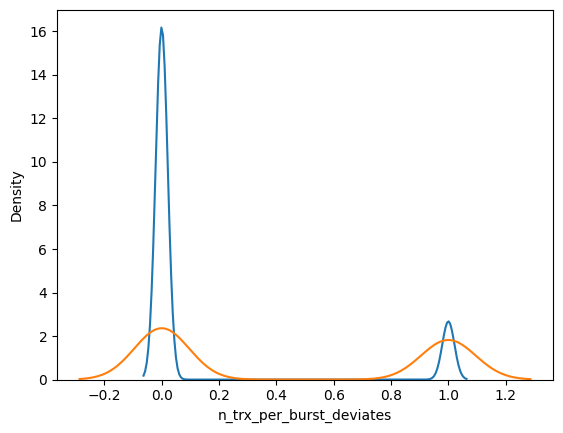

In [50]:
sns.kdeplot(trx[trx.tx_fraud==0]['n_trx_per_burst_deviates'], label='legit')
sns.kdeplot(trx[trx.tx_fraud==1]['n_trx_per_burst_deviates'], label='fraud')
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(trx['tx_fraud'], trx['n_tx_in_burst'])
print(auc)

### Calculate percentage difference

How many of fraud transactions with deviation of per burst are there?

In [51]:
trx[(trx["n_trx_per_burst_deviates"] == 1) & (trx['tx_fraud'] == 1)]

,customer_id,tx_datetime,tx_amount,sector_id,tx_fraud,tx_amount_log,ones,day_of_week,hour,month,...,is_weekend,tx_amount_log_mean,tx_amount_log_std,tx_amount_log_deviates,secs_since_prev_tx,burst_id,n_tx_in_burst,burst_mean,burst_std,n_trx_per_burst_deviates
832,3,2023-02-25 10:37:59,311.829793,0,1,5.745659,1,5,10,2,...,1,5.798319,0.135882,0,20995.0,66,3,1.563707,0.857477,1
833,3,2023-02-25 10:40:19,284.229508,0,1,5.653294,1,5,10,2,...,1,5.798319,0.135882,1,140.0,66,3,1.563707,0.857477,1
834,3,2023-02-25 10:40:26,294.491640,0,1,5.688641,1,5,10,2,...,1,5.798319,0.135882,0,7.0,66,3,1.563707,0.857477,1
1002,3,2023-06-18 01:07:42,278.394778,0,1,5.632626,1,6,1,6,...,1,5.798319,0.135882,1,216452.0,202,4,1.563707,0.857477,1
1003,3,2023-06-18 01:11:34,286.249849,0,1,5.660352,1,6,1,6,...,1,5.798319,0.135882,1,232.0,202,4,1.563707,0.857477,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229349,4997,2023-03-18 12:29:41,444.385982,13,1,6.098941,1,5,12,3,...,1,6.008254,0.131201,0,42.0,105,3,1.528455,1.152284,1
1229350,4997,2023-03-18 12:29:51,464.438984,13,1,6.142981,1,5,12,3,...,1,6.008254,0.131201,1,10.0,105,3,1.528455,1.152284,1
1229830,4999,2023-04-28 15:22:03,372.309391,0,1,5.922408,1,4,15,4,...,0,5.749101,0.127209,1,178786.0,112,3,1.445455,0.794805,1
1229831,4999,2023-04-28 15:22:28,346.204582,0,1,5.849914,1,4,15,4,...,0,5.749101,0.127209,0,25.0,112,3,1.445455,0.794805,1


In [52]:
trx[(trx["n_trx_per_burst_deviates"] == 1) & (trx['tx_fraud'] == 1)].shape[0] / trx[trx['tx_fraud'] == 1].shape[0]

0.43530034400635087

## Intermediate conclusions + further steps

43% of fraud transactions are confirmed by this feature

So far so good

What about other deviations?
* Relation of transaction value to mean of this user?
* Other metrics for the values deviations
    * `z-score`
    * `iqr`
    * `robust scalling`
* Datetime attributes?
    * hour
    * day of the week
    * month
    * rolling difference between dates
* Sector attributes
    * Unsual amount per sector

## Z-score

Let us see if there is some correlation between `z-score` and `fraud` transactions:

In [53]:
trx.columns

Index(['customer_id', 'tx_datetime', 'tx_amount', 'sector_id', 'tx_fraud',
       'tx_amount_log', 'ones', 'day_of_week', 'hour', 'month',
       'is_month_start', 'is_month_end', 'is_weekend', 'tx_amount_log_mean',
       'tx_amount_log_std', 'tx_amount_log_deviates', 'secs_since_prev_tx',
       'burst_id', 'n_tx_in_burst', 'burst_mean', 'burst_std',
       'n_trx_per_burst_deviates'],
      dtype='object')

In [54]:
trx['zscore'] = trx.groupby('customer_id').apply(lambda x: (x['tx_amount_log'] - x['tx_amount_log_mean']) / x['tx_amount_log_std']).to_numpy()
trx['is_zscore_outlier'] = (trx['zscore'] > 3).astype(int)

/var/folders/v0/8r5h4ym13fb_mzmqc1hfkt580000gn/T/ipykernel_82160/3755592015.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  trx['zscore'] = trx.groupby('customer_id').apply(lambda x: (x['tx_amount_log'] - x['tx_amount_log_mean']) / x['tx_amount_log_std']).to_numpy()


In [55]:
zscore_frauds = trx[(trx['zscore'] > 3) & (trx['tx_fraud'] == 1)]
zscore_frauds

,customer_id,tx_datetime,tx_amount,sector_id,tx_fraud,tx_amount_log,ones,day_of_week,hour,month,...,tx_amount_log_std,tx_amount_log_deviates,secs_since_prev_tx,burst_id,n_tx_in_burst,burst_mean,burst_std,n_trx_per_burst_deviates,zscore,is_zscore_outlier
760,3,2023-01-12 11:06:22,625.092862,0,1,6.439499,1,3,11,1,...,0.135882,1,130016.0,8,1,1.563707,0.857477,0,4.718660,1
4939,20,2023-04-07 17:58:33,137.126173,3,1,4.928168,1,4,17,4,...,0.198586,1,336727.0,136,1,1.223140,0.498755,0,4.567928,1
6614,27,2023-03-20 14:12:18,218.242890,5,1,5.390180,1,0,14,3,...,0.207991,1,8457.0,114,1,1.333333,0.781601,0,4.127191,1
9329,38,2023-03-04 11:26:03,459.857639,10,1,6.133089,1,5,11,3,...,0.127760,1,8373.0,61,1,1.290323,0.505423,0,4.036508,1
9753,39,2023-06-13 01:37:28,471.825340,10,1,6.158726,1,1,1,6,...,0.140275,1,65716.0,213,1,1.357977,0.715526,0,3.826396,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218811,4955,2023-01-17 13:22:48,1001.233543,11,1,6.909986,1,1,13,1,...,0.214109,1,9856.0,19,1,1.432432,0.935036,0,3.448247,1
1221523,4965,2023-04-03 04:59:41,541.295355,0,1,6.295811,1,0,4,4,...,0.157042,1,12192.0,99,1,1.286957,0.507846,0,3.949312,1
1225574,4982,2023-01-07 12:29:06,1071.079284,16,1,6.977355,1,5,12,1,...,0.086612,1,5983.0,3,1,1.350195,0.626506,0,4.361949,1
1227030,4988,2023-01-08 08:56:33,217.748674,2,1,5.387923,1,6,8,1,...,0.167385,1,1577.0,2,11,1.891473,2.220318,1,4.018778,1


### Calculate percentage difference

In [56]:
zscore_frauds.shape[0] / trx[trx['tx_fraud'] == 1].shape[0]

0.23286583752315426

23% of fraud transactions might be identified by this feature

## IQR

In [57]:
q1 = trx['tx_amount_log'].quantile(0.25)
q3 = trx['tx_amount_log'].quantile(0.75)
iqr = q3 - q1
trx['is_iqr_outlier'] = (~trx['tx_amount_log'].between(q1 - 0.5*iqr, q3 + 0.5*iqr)).astype(int)

In [58]:
irq_outliers = trx[(trx['tx_fraud'] == 1) & (trx['is_iqr_outlier'] == 1)]
irq_outliers

,customer_id,tx_datetime,tx_amount,sector_id,tx_fraud,tx_amount_log,ones,day_of_week,hour,month,...,tx_amount_log_deviates,secs_since_prev_tx,burst_id,n_tx_in_burst,burst_mean,burst_std,n_trx_per_burst_deviates,zscore,is_zscore_outlier,is_iqr_outlier
8600,35,2023-03-29 12:29:59,2418.076995,17,1,7.791141,1,2,12,3,...,1,12328.0,82,2,1.417910,0.757943,0,1.060410,0,1
13092,54,2023-01-04 19:11:42,2108.657183,17,1,7.654281,1,2,19,1,...,0,31878.0,6,3,1.298246,0.669405,1,-0.054582,0,1
13093,54,2023-01-04 19:14:13,2187.429612,17,1,7.690939,1,2,19,1,...,0,151.0,6,3,1.298246,0.669405,1,0.198766,0,1
13094,54,2023-01-04 19:14:59,2272.117288,17,1,7.728907,1,2,19,1,...,0,46.0,6,3,1.298246,0.669405,1,0.461162,0,1
18336,75,2023-06-01 17:20:08,2297.682774,17,1,7.740092,1,3,17,6,...,0,37206.0,184,4,1.482213,0.866415,1,0.628871,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204808,4897,2023-03-11 17:04:33,2187.522746,17,1,7.690982,1,5,17,3,...,0,8262.0,88,2,1.415385,0.894294,0,0.040657,0,1
1215268,4940,2023-05-03 16:04:27,2652.788282,17,1,7.883743,1,2,16,5,...,1,10102.0,150,1,1.257261,0.540254,0,2.005453,0,1
1215329,4940,2023-06-12 08:41:06,2429.285782,17,1,7.795764,1,0,8,6,...,1,10342.0,204,1,1.257261,0.540254,0,1.049277,0,1
1226486,4985,2023-04-05 03:30:56,2086.317421,19,1,7.643635,1,2,3,4,...,1,52623.0,105,2,1.545455,1.093170,0,2.822938,0,1


### Calculate percentage difference

In [59]:
irq_outliers.shape[0] / trx[trx['tx_fraud'] == 1].shape[0]

0.08600158772161948

8% of transactions has this feature

## Robust scaling

In [60]:
eps = 1e-9  # защита от нулевого IQR
q1 = trx.groupby('customer_id')['tx_amount_log'].transform(lambda s: s.quantile(0.25))
q3 = trx.groupby('customer_id')['tx_amount_log'].transform(lambda s: s.quantile(0.75))
med = trx.groupby('customer_id')['tx_amount_log'].transform('median')
iqr = (q3 - q1).replace(0, np.nan).fillna(eps)

trx['tx_amount_log_scaled'] = (trx['tx_amount_log'] - med) / iqr
trx['is_rs_anomaly'] = (trx['tx_amount_log_scaled'].abs() > 1.5).astype(int)

In [61]:
rs_fraud_anomaly = trx[(trx['is_rs_anomaly'] == 1) & (trx['tx_fraud'] == 1)]

### Calculate percentage difference

In [62]:
rs_fraud_anomaly.shape[0] / trx[trx['tx_fraud'] == 1].shape[0]

0.449854458851548

44% of fraud transactions are having this feature

## Datetime attributes

In [63]:
trx['hour_zscore'] = trx.groupby('customer_id').apply(lambda x: (x['hour'] - x['hour'].mean()) / x['hour'].std()).to_numpy()

/var/folders/v0/8r5h4ym13fb_mzmqc1hfkt580000gn/T/ipykernel_82160/2588731580.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  trx['hour_zscore'] = trx.groupby('customer_id').apply(lambda x: (x['hour'] - x['hour'].mean()) / x['hour'].std()).to_numpy()


In [64]:
trx[(trx['hour_zscore'].abs() > 2) & (trx['tx_fraud'] == 1)]

,customer_id,tx_datetime,tx_amount,sector_id,tx_fraud,tx_amount_log,ones,day_of_week,hour,month,...,n_tx_in_burst,burst_mean,burst_std,n_trx_per_burst_deviates,zscore,is_zscore_outlier,is_iqr_outlier,tx_amount_log_scaled,is_rs_anomaly,hour_zscore
1002,3,2023-06-18 01:07:42,278.394778,0,1,5.632626,1,6,1,6,...,4,1.563707,0.857477,1,-1.219389,0,0,-0.896650,0,-2.127692
1003,3,2023-06-18 01:11:34,286.249849,0,1,5.660352,1,6,1,6,...,4,1.563707,0.857477,1,-1.015339,0,0,-0.738525,0,-2.127692
1004,3,2023-06-18 01:12:01,283.070112,0,1,5.649221,1,6,1,6,...,4,1.563707,0.857477,1,-1.097259,0,0,-0.802007,0,-2.127692
1005,3,2023-06-18 01:12:42,297.004321,0,1,5.697108,1,6,1,6,...,4,1.563707,0.857477,1,-0.744843,0,0,-0.528908,0,-2.127692
9753,39,2023-06-13 01:37:28,471.825340,10,1,6.158726,1,1,1,6,...,1,1.357977,0.715526,0,3.826396,1,0,3.063589,1,-2.107743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146793,4659,2023-05-27 01:29:17,101.231420,2,1,4.627239,1,5,1,5,...,4,1.583732,1.455733,1,-0.325626,0,0,-0.295614,0,-2.126568
1148312,4666,2023-01-18 02:10:04,1081.660246,16,1,6.987176,1,2,2,1,...,1,1.233503,0.491036,0,2.197664,0,0,1.919124,1,-2.110652
1185515,4818,2023-03-08 00:32:09,3100.364837,17,1,8.039598,1,2,0,3,...,1,1.363636,0.798176,0,2.700348,0,1,1.772270,1,-2.272035
1189215,4833,2023-05-06 00:39:52,1013.150687,16,1,6.921807,1,5,0,5,...,1,1.406375,0.776015,0,3.684139,1,0,2.716959,1,-2.106696


## Calculate overall difference between transactions under the founded features and oveall fraud transactions

Let us see, how many transactions are left after calculating all the features

In [65]:
burst_df = trx[(trx["n_trx_per_burst_deviates"] == 1) & (trx['tx_fraud'] == 1)]

In [66]:
burst_set = set(burst_df.index.to_list())

In [67]:
zscore_set = set(zscore_frauds.index.to_list())

In [68]:
irq_set = set(irq_outliers.index.to_list())

In [69]:
rs_set = set(rs_fraud_anomaly.index.to_list())

In [70]:
479345 in rs_set

True

In [71]:
amount_set = set(trx_amount_log_deviates.index.to_list())

In [72]:
union_set = burst_set.union(zscore_set).union(irq_set).union(rs_set).union(amount_set)

In [73]:
fraud_set = set(trx[trx['tx_fraud'] == 1].index.to_list())

In [74]:
set_diff = fraud_set - union_set
set_full_difference = fraud_set.difference(union_set)

In [75]:
len(set_diff), set_diff == set_full_difference,  479345 in set_full_difference, len(set_diff) / len(fraud_set)

(199, True, False, 0.05265943371262239)

Based on this calculations, these features catched most of the fraud transactions

However, there are still 417 (or ~11%) fraud transactions, that were not caught

Keep digging

In [76]:
frauds_df = trx.iloc[list(set_full_difference)]

## Robust rolling outlier

Let us start with user `1944`:

In [77]:
user_df = trx[trx['customer_id'] == 1944]
user_df

,customer_id,tx_datetime,tx_amount,sector_id,tx_fraud,tx_amount_log,ones,day_of_week,hour,month,...,n_tx_in_burst,burst_mean,burst_std,n_trx_per_burst_deviates,zscore,is_zscore_outlier,is_iqr_outlier,tx_amount_log_scaled,is_rs_anomaly,hour_zscore
479227,1944,2023-01-07 05:01:55,614.599485,15,0,6.422597,1,5,5,1,...,1,1.34375,0.679533,0,-1.126990,0,0,-1.198160,0,-1.141997
479228,1944,2023-01-07 21:28:20,615.475407,15,0,6.424018,1,5,21,1,...,1,1.34375,0.679533,0,-1.118684,0,0,-1.190357,0,1.879722
479229,1944,2023-01-11 16:37:57,645.648706,15,0,6.471803,1,2,16,1,...,1,1.34375,0.679533,0,-0.839545,0,0,-0.928131,0,0.935435
479230,1944,2023-01-13 12:49:03,623.348688,15,0,6.436709,1,4,12,1,...,1,1.34375,0.679533,0,-1.044551,0,0,-1.120716,0,0.180005
479231,1944,2023-01-14 17:03:19,549.948380,15,0,6.311641,1,5,17,1,...,1,1.34375,0.679533,0,-1.775148,0,0,-1.807045,1,1.124292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479478,1944,2023-06-10 10:00:48,710.960380,15,0,6.568022,1,5,10,6,...,1,1.34375,0.679533,0,-0.277471,0,0,-0.400113,0,-0.197710
479479,1944,2023-06-12 18:50:54,756.291125,15,0,6.629748,1,0,18,6,...,1,1.34375,0.679533,0,0.083105,0,0,-0.061385,0,1.313150
479480,1944,2023-06-15 16:21:18,714.613535,15,0,6.573140,1,3,16,6,...,1,1.34375,0.679533,0,-0.247574,0,0,-0.372027,0,0.935435
479481,1944,2023-06-16 12:02:46,696.843209,15,0,6.547994,1,4,12,6,...,1,1.34375,0.679533,0,-0.394466,0,0,-0.510019,0,0.180005


In [78]:
frauds_df[frauds_df['customer_id'] == 1944]

,customer_id,tx_datetime,tx_amount,sector_id,tx_fraud,tx_amount_log,ones,day_of_week,hour,month,...,n_tx_in_burst,burst_mean,burst_std,n_trx_per_burst_deviates,zscore,is_zscore_outlier,is_iqr_outlier,tx_amount_log_scaled,is_rs_anomaly,hour_zscore


How many frauds does this user has?

In [79]:
user_df[user_df['tx_fraud'] == 1]

,customer_id,tx_datetime,tx_amount,sector_id,tx_fraud,tx_amount_log,ones,day_of_week,hour,month,...,n_tx_in_burst,burst_mean,burst_std,n_trx_per_burst_deviates,zscore,is_zscore_outlier,is_iqr_outlier,tx_amount_log_scaled,is_rs_anomaly,hour_zscore
479235,1944,2023-01-18 11:26:34,908.555121,15,1,6.812956,1,2,11,1,...,1,1.34375,0.679533,0,1.153332,0,0,0.943997,0,-0.008853
479345,1944,2023-03-27 08:21:33,1008.474591,15,1,6.917185,1,0,8,3,...,1,1.34375,0.679533,0,1.762201,0,0,1.515974,1,-0.575425


In [80]:
user_df[user_df['tx_fraud'] == 1][[
    'tx_datetime',
    'tx_amount_log',
    'secs_since_prev_tx',
    'day_of_week',
    'burst_id',
    'burst_mean',
    'burst_std',
    'tx_amount_log_deviates',
    'tx_amount_log_mean',
    'tx_amount_log_std',
    'n_trx_per_burst_deviates',
    'n_tx_in_burst',
    'is_rs_anomaly',
    'zscore',
    'hour_zscore'
]]

,tx_datetime,tx_amount_log,secs_since_prev_tx,day_of_week,burst_id,burst_mean,burst_std,tx_amount_log_deviates,tx_amount_log_mean,tx_amount_log_std,n_trx_per_burst_deviates,n_tx_in_burst,is_rs_anomaly,zscore,hour_zscore
479235,2023-01-18 11:26:34,6.812956,78031.0,2,7,1.34375,0.679533,1,6.615521,0.171186,0,1,0,1.153332,-0.008853
479345,2023-03-27 08:21:33,6.917185,7347.0,0,101,1.34375,0.679533,1,6.615521,0.171186,0,1,1,1.762201,-0.575425


Let us a look at transactions of this user on the week of first fraud transaction

In [81]:
week_df = user_df[(user_df['tx_datetime'] >= '2023-01-16') & (user_df['tx_datetime'] < '2023-01-23')]
week_df[[
    'tx_fraud',
    'tx_datetime',
    'tx_amount_log',
    'secs_since_prev_tx',
    'day_of_week',
    'burst_id',
    'burst_mean',
    'burst_std',
    'tx_amount_log_deviates',
    'tx_amount_log_mean',
    'tx_amount_log_std',
    'n_trx_per_burst_deviates',
    'n_tx_in_burst',
    'is_rs_anomaly',
    'zscore',
    'hour_zscore'
]]

,tx_fraud,tx_datetime,tx_amount_log,secs_since_prev_tx,day_of_week,burst_id,burst_mean,burst_std,tx_amount_log_deviates,tx_amount_log_mean,tx_amount_log_std,n_trx_per_burst_deviates,n_tx_in_burst,is_rs_anomaly,zscore,hour_zscore
479232,0,2023-01-16 07:23:10,6.310042,137991.0,0,5,1.34375,0.679533,1,6.615521,0.171186,0,2,1,-1.784488,-0.764283
479233,0,2023-01-16 07:47:09,6.388076,1439.0,0,5,1.34375,0.679533,1,6.615521,0.171186,0,2,0,-1.328648,-0.764283
479234,0,2023-01-17 13:46:03,6.261637,107934.0,1,6,1.34375,0.679533,1,6.615521,0.171186,0,1,1,-2.067252,0.368862
479235,1,2023-01-18 11:26:34,6.812956,78031.0,2,7,1.34375,0.679533,1,6.615521,0.171186,0,1,0,1.153332,-0.008853
479236,0,2023-01-20 02:56:39,6.115398,142205.0,4,8,1.34375,0.679533,1,6.615521,0.171186,0,1,1,-2.921521,-1.708570
479237,0,2023-01-20 20:42:19,6.189692,63940.0,4,9,1.34375,0.679533,1,6.615521,0.171186,0,1,1,-2.487528,1.690864


Tx amount deviation does not work here - all of the transactions for this week are deviating from mean

However, it seems that fraud transaction has amount higher than other transactions

Let us look in this direction and build features for rolling windows:

In [82]:
window_features = []
for window in ['7d', '14d', '21d', '30d']:
    mean_column = f'tx_amount_log_mean_{window}'
    std_column = f'tx_amount_log_std_{window}'
    zscore_column = f'tx_amount_log_zscore_{window}'
    is_outlier_column = f'is_tx_amount_log_outlier_{window}'

    week_rolling = week_df.set_index('tx_datetime')['tx_amount_log'].shift().rolling('7d')
    mean_ = week_rolling.mean().fillna(0).to_numpy()
    std_ = week_rolling.std().fillna(0).to_numpy()
    week_df[mean_column] = mean_
    week_df[std_column] = std_

    week_df[zscore_column] =  (
        (week_df['tx_amount_log'] - week_df['tx_amount_log_mean_7d']) / (week_df['tx_amount_log_std_7d'] + eps)
    )
    week_df[is_outlier_column] = (
        (week_df['tx_amount_log'] < (week_df['tx_amount_log_mean_7d'] - week_df['tx_amount_log_std_7d'])) | 
        (week_df['tx_amount_log'] > (week_df['tx_amount_log_mean_7d'] + week_df['tx_amount_log_std_7d']))
    ).astype(int)
    window_features.extend([
        mean_column,
        std_column,
        zscore_column,
        is_outlier_column
    ])



/var/folders/v0/8r5h4ym13fb_mzmqc1hfkt580000gn/T/ipykernel_82160/296465518.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_df[mean_column] = mean_
/var/folders/v0/8r5h4ym13fb_mzmqc1hfkt580000gn/T/ipykernel_82160/296465518.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_df[std_column] = std_
/var/folders/v0/8r5h4ym13fb_mzmqc1hfkt580000gn/T/ipykernel_82160/296465518.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [83]:
week_df[[
    'tx_fraud',
    'tx_datetime',
    'tx_amount_log',
] + window_features]

,tx_fraud,tx_datetime,tx_amount_log,tx_amount_log_mean_7d,tx_amount_log_std_7d,tx_amount_log_zscore_7d,is_tx_amount_log_outlier_7d,tx_amount_log_mean_14d,tx_amount_log_std_14d,tx_amount_log_zscore_14d,is_tx_amount_log_outlier_14d,tx_amount_log_mean_21d,tx_amount_log_std_21d,tx_amount_log_zscore_21d,is_tx_amount_log_outlier_21d,tx_amount_log_mean_30d,tx_amount_log_std_30d,tx_amount_log_zscore_30d,is_tx_amount_log_outlier_30d
479232,0,2023-01-16 07:23:10,6.310042,0.000000,0.000000,6.310042e+09,1,0.000000,0.000000,6.310042e+09,1,0.000000,0.000000,6.310042e+09,1,0.000000,0.000000,6.310042e+09,1
479233,0,2023-01-16 07:47:09,6.388076,6.310042,0.000000,7.803340e+07,1,6.310042,0.000000,7.803340e+07,1,6.310042,0.000000,7.803340e+07,1,6.310042,0.000000,7.803340e+07,1
479234,0,2023-01-17 13:46:03,6.261637,6.349059,0.055178,-1.584362e+00,1,6.349059,0.055178,-1.584362e+00,1,6.349059,0.055178,-1.584362e+00,1,6.349059,0.055178,-1.584362e+00,1
479235,1,2023-01-18 11:26:34,6.812956,6.319918,0.063795,7.728435e+00,1,6.319918,0.063795,7.728435e+00,1,6.319918,0.063795,7.728435e+00,1,6.319918,0.063795,7.728435e+00,1
479236,0,2023-01-20 02:56:39,6.115398,6.443178,0.251962,-1.300910e+00,1,6.443178,0.251962,-1.300910e+00,1,6.443178,0.251962,-1.300910e+00,1,6.443178,0.251962,-1.300910e+00,1
479237,0,2023-01-20 20:42:19,6.189692,6.377622,0.262871,-7.149123e-01,0,6.377622,0.262871,-7.149123e-01,0,6.377622,0.262871,-7.149123e-01,0,6.377622,0.262871,-7.149123e-01,0


Unfortunately, it seems that these features does not provide enough value for investigation

Let us try to work with rolling median value

It might be the case, that we indeed looking for:

In [84]:
window = 20
min_periods = 5

user_df['rolling_median'] = user_df.groupby('customer_id')['tx_amount_log'].rolling(
    window, min_periods=min_periods
).median().fillna(0.0).to_numpy()
user_df['q1'] = user_df.groupby('customer_id')['tx_amount_log'].rolling(window, min_periods=min_periods).quantile(0.25).to_numpy()
user_df['q3'] = user_df.groupby('customer_id')['tx_amount_log'].rolling(window, min_periods=min_periods).quantile(0.75).to_numpy()
user_df['iqr'] = user_df['q3'] - user_df['q1']

user_df['amount_robust_rolling20'] = (user_df['tx_amount_log'] - user_df['rolling_median']) / (user_df['iqr'] + eps)

user_df['amount_robust_rolling20'] = user_df['amount_robust_rolling20'].fillna(0)
user_df['is_amount_robust_rolling_outlier'] = (user_df['amount_robust_rolling20'] > 3).astype(int)

/var/folders/v0/8r5h4ym13fb_mzmqc1hfkt580000gn/T/ipykernel_82160/3303593722.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['rolling_median'] = user_df.groupby('customer_id')['tx_amount_log'].rolling(
/var/folders/v0/8r5h4ym13fb_mzmqc1hfkt580000gn/T/ipykernel_82160/3303593722.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['q1'] = user_df.groupby('customer_id')['tx_amount_log'].rolling(window, min_periods=min_periods).quantile(0.25).to_numpy()
/var/folders/v0/8r5h4ym13fb_mzmqc1hfkt58

In [85]:
week_df = user_df[(user_df['tx_datetime'] >= '2023-01-16') & (user_df['tx_datetime'] < '2023-01-23')]

In [86]:
week_df[[
    'tx_fraud',
    'customer_id',
    'tx_datetime',
    'tx_amount_log',
    'sector_id',
    'rolling_median',
    'q1',
    'q3',
    'iqr',
    'amount_robust_rolling20',
    'is_amount_robust_rolling_outlier'
]]

,tx_fraud,customer_id,tx_datetime,tx_amount_log,sector_id,rolling_median,q1,q3,iqr,amount_robust_rolling20,is_amount_robust_rolling_outlier
479232,0,1944,2023-01-16 07:23:10,6.310042,15,6.423307,6.339380,6.433536,0.094156,-1.202948,0
479233,0,1944,2023-01-16 07:47:09,6.388076,15,6.422597,6.349858,6.430364,0.080505,-0.428803,0
479234,0,1944,2023-01-17 13:46:03,6.261637,15,6.405336,6.311241,6.427191,0.115950,-1.239322,0
479235,1,1944,2023-01-18 11:26:34,6.812956,15,6.422597,6.311641,6.436709,0.125068,3.121177,1
479236,0,1944,2023-01-20 02:56:39,6.115398,15,6.405336,6.310442,6.433536,0.123094,-2.355411,0
479237,0,1944,2023-01-20 20:42:19,6.189692,15,6.388076,6.285840,6.430364,0.144524,-1.372670,0


Seems like the assumption is correct!

Apply this metric for the whole dataframe

In [87]:
window = 20
min_periods = 5

trx['rolling_median'] = trx.groupby('customer_id')['tx_amount_log'].rolling(
    window, min_periods=min_periods
).median().fillna(0.0).to_numpy()
trx['q1'] = trx.groupby('customer_id')['tx_amount_log'].rolling(window, min_periods=min_periods).quantile(0.25).to_numpy()
trx['q3'] = trx.groupby('customer_id')['tx_amount_log'].rolling(window, min_periods=min_periods).quantile(0.75).to_numpy()
trx['iqr'] = trx['q3'] - trx['q1']

trx['amount_robust_rolling20'] = (trx['tx_amount_log'] - trx['rolling_median']) / (trx['iqr'] + eps)

trx['amount_robust_rolling20'] = trx['amount_robust_rolling20'].fillna(0)
trx['is_amount_robust_rolling_outlier'] = (trx['amount_robust_rolling20'] > 3).astype(int)

In [88]:
robist_rolling_frauds = trx[(trx['is_amount_robust_rolling_outlier'] == 1) & (trx['tx_fraud'] == 1)]
robist_rolling_frauds

,customer_id,tx_datetime,tx_amount,sector_id,tx_fraud,tx_amount_log,ones,day_of_week,hour,month,...,is_iqr_outlier,tx_amount_log_scaled,is_rs_anomaly,hour_zscore,rolling_median,q1,q3,iqr,amount_robust_rolling20,is_amount_robust_rolling_outlier
215,0,2023-06-02 08:58:13,695.183602,4,1,6.545613,1,4,8,6,...,0,1.330489,0,-0.733129,6.229304,6.193189,6.264100,0.070911,4.460625,1
760,3,2023-01-12 11:06:22,625.092862,0,1,6.439499,1,3,11,1,...,0,3.704942,1,-0.052090,5.797718,5.718756,5.901400,0.182644,3.513830,1
5429,22,2023-04-11 10:38:56,291.265552,14,1,5.677663,1,1,10,4,...,0,1.976495,1,-0.271152,5.283474,5.239623,5.335694,0.096071,4.103102,1
6614,27,2023-03-20 14:12:18,218.242890,5,1,5.390180,1,0,14,3,...,0,3.125557,1,0.594735,4.560211,4.462189,4.679191,0.217003,3.824697,1
8600,35,2023-03-29 12:29:59,2418.076995,17,1,7.791141,1,2,12,3,...,1,1.125973,0,-0.021975,7.594285,7.578385,7.625951,0.047566,4.138612,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226486,4985,2023-04-05 03:30:56,2086.317421,19,1,7.643635,1,2,3,4,...,1,1.786266,1,-1.547689,7.315267,7.296482,7.368971,0.072489,4.529876,1
1227030,4988,2023-01-08 08:56:33,217.748674,2,1,5.387923,1,6,8,1,...,0,3.169773,1,-0.696654,4.772576,4.736687,4.868801,0.132115,4.657675,1
1228292,4993,2023-02-16 09:13:06,904.772949,4,1,6.808789,1,3,9,2,...,0,3.044948,1,-0.660939,6.439543,6.386996,6.500788,0.113792,3.244929,1
1229031,4996,2023-02-11 08:20:47,2168.287559,19,1,7.682154,1,5,8,2,...,1,1.696894,1,-0.754534,7.427774,7.408483,7.469762,0.061278,4.151211,1


### Calculate percentage difference

In [89]:
robist_rolling_frauds_set = set(robist_rolling_frauds.index.to_list())
union_set = burst_set.union(zscore_set).union(irq_set).union(rs_set).union(amount_set).union(robist_rolling_frauds_set)
set_diff = fraud_set.difference(union_set)
(len(set_diff) / len(fraud_set)) * 100, len(set_diff)

(4.207462291611538, 159)

This pattern decreased number of transactions on ~7%, from 11% to 4%

In [90]:
fraud_df = trx.iloc[list(set_diff)]

## Mean day of the week

Let us look at transactions of user `1099`

In [91]:
fraud_df[fraud_df['customer_id'] == 1099]

,customer_id,tx_datetime,tx_amount,sector_id,tx_fraud,tx_amount_log,ones,day_of_week,hour,month,...,is_iqr_outlier,tx_amount_log_scaled,is_rs_anomaly,hour_zscore,rolling_median,q1,q3,iqr,amount_robust_rolling20,is_amount_robust_rolling_outlier
270298,1099,2023-04-01 17:07:33,404.816561,13,1,6.005901,1,5,17,4,...,0,-0.110267,0,1.161556,6.107412,6.051227,6.143643,0.092415,-1.098422,0
270299,1099,2023-04-01 17:08:04,418.709327,13,1,6.039562,1,5,17,4,...,0,0.099151,0,1.161556,6.107412,6.045038,6.143643,0.098605,-0.688101,0
270300,1099,2023-04-01 17:08:23,450.621397,13,1,6.112844,1,5,17,4,...,0,0.555062,0,1.161556,6.113490,6.051227,6.143643,0.092415,-0.006992,0


In [92]:
user_df = trx[trx['customer_id'] == 1099]
user_df

,customer_id,tx_datetime,tx_amount,sector_id,tx_fraud,tx_amount_log,ones,day_of_week,hour,month,...,is_iqr_outlier,tx_amount_log_scaled,is_rs_anomaly,hour_zscore,rolling_median,q1,q3,iqr,amount_robust_rolling20,is_amount_robust_rolling_outlier
270162,1099,2023-01-05 08:33:50,374.395835,13,0,5.927981,1,3,8,1,...,0,-0.595035,0,-0.693606,0.000000,NaN,NaN,NaN,0.000000,0
270163,1099,2023-01-05 10:41:26,356.111454,13,0,5.878048,1,3,10,1,...,0,-0.905686,0,-0.281348,0.000000,NaN,NaN,NaN,0.000000,0
270164,1099,2023-01-05 10:54:50,336.427646,13,0,5.821351,1,3,10,1,...,0,-1.258416,0,-0.281348,0.000000,NaN,NaN,NaN,0.000000,0
270165,1099,2023-01-05 12:58:59,335.773958,13,0,5.819412,1,3,12,1,...,0,-1.270480,0,0.130910,0.000000,NaN,NaN,NaN,0.000000,0
270166,1099,2023-01-05 16:22:08,388.145054,13,0,5.963952,1,3,16,1,...,0,-0.371246,0,0.955427,5.878048,5.821351,5.927981,0.106630,0.805630,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270442,1099,2023-06-15 14:09:26,376.002110,13,0,5.932251,1,3,14,6,...,0,-0.568471,0,0.543168,5.821498,5.697153,5.935499,0.238346,0.464670,0
270443,1099,2023-06-15 19:25:06,396.793803,13,0,5.985934,1,3,19,6,...,0,-0.234491,0,1.573814,5.838275,5.719212,5.951050,0.231838,0.636905,0
270444,1099,2023-06-17 10:23:06,393.306089,13,0,5.977127,1,5,10,6,...,0,-0.289278,0,-0.281348,5.872452,5.766084,5.970631,0.204547,0.511741,0
270445,1099,2023-06-18 01:57:06,431.074145,13,0,6.068597,1,6,1,6,...,0,0.279787,0,-2.136510,5.906891,5.791794,5.979329,0.187535,0.862271,0


In [93]:
week_df = user_df[(user_df['tx_datetime'] >= '2023-03-27') & (user_df['tx_datetime'] <= '2023-04-02')]
week_df

,customer_id,tx_datetime,tx_amount,sector_id,tx_fraud,tx_amount_log,ones,day_of_week,hour,month,...,is_iqr_outlier,tx_amount_log_scaled,is_rs_anomaly,hour_zscore,rolling_median,q1,q3,iqr,amount_robust_rolling20,is_amount_robust_rolling_outlier
270291,1099,2023-03-27 11:05:36,445.164636,13,0,6.100688,1,0,11,3,...,0,0.479435,0,-0.075219,6.108317,6.058497,6.172429,0.113932,-0.066961,0
270292,1099,2023-03-28 10:07:16,465.618155,13,0,6.145511,1,1,10,3,...,0,0.758295,0,-0.281348,6.128761,6.058497,6.172429,0.113932,0.147021,0
270293,1099,2023-03-28 10:44:42,431.379670,13,0,6.069304,1,1,10,3,...,0,0.284184,0,-0.281348,6.108317,6.058497,6.154702,0.096205,-0.405517,0
270294,1099,2023-03-28 13:13:03,451.205432,13,0,6.114137,1,1,13,3,...,0,0.563103,0,0.337039,6.114648,6.064958,6.154702,0.089744,-0.005704,0
270295,1099,2023-03-28 15:12:49,421.784857,13,0,6.046863,1,1,15,3,...,0,0.144573,0,0.749297,6.114648,6.057388,6.154702,0.097315,-0.696554,0
270296,1099,2023-03-28 15:36:05,451.319277,13,0,6.114388,1,1,15,3,...,0,0.564669,0,0.749297,6.114262,6.057388,6.146071,0.088684,0.001419,0
270297,1099,2023-03-30 07:04:32,383.808617,13,0,5.952746,1,3,7,3,...,0,-0.440963,0,-0.899736,6.107805,6.052910,6.143643,0.090733,-1.708957,0
270298,1099,2023-04-01 17:07:33,404.816561,13,1,6.005901,1,5,17,4,...,0,-0.110267,0,1.161556,6.107412,6.051227,6.143643,0.092415,-1.098422,0
270299,1099,2023-04-01 17:08:04,418.709327,13,1,6.039562,1,5,17,4,...,0,0.099151,0,1.161556,6.107412,6.045038,6.143643,0.098605,-0.688101,0
270300,1099,2023-04-01 17:08:23,450.621397,13,1,6.112844,1,5,17,4,...,0,0.555062,0,1.161556,6.113490,6.051227,6.143643,0.092415,-0.006992,0


In [94]:
mean_ = user_df.groupby('customer_id')['day_of_week'].transform('mean')
std_ = user_df.groupby('customer_id')['day_of_week'].transform('std')
user_df['day_of_week_mean'] = mean_.fillna(0)
user_df['day_of_week_std'] = std_.fillna(0)
user_df['is_day_of_week_mean_outlier'] = (
    (user_df['day_of_week'] < (user_df['day_of_week_mean'] - user_df['day_of_week_std'])) |
    (user_df['day_of_week'] > (user_df['day_of_week_mean'] + user_df['day_of_week_std']))
).astype(int)
user_df['day_of_week_zscore'] =  user_df.groupby('customer_id').apply(lambda x: (x['day_of_week'] - x['day_of_week_mean']) / x['day_of_week_std']).T
user_df['is_day_of_week_zscore_outlier'] = (user_df['day_of_week_zscore'].abs() > 2).astype(int)

/var/folders/v0/8r5h4ym13fb_mzmqc1hfkt580000gn/T/ipykernel_82160/157975335.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['day_of_week_mean'] = mean_.fillna(0)
/var/folders/v0/8r5h4ym13fb_mzmqc1hfkt580000gn/T/ipykernel_82160/157975335.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['day_of_week_std'] = std_.fillna(0)
/var/folders/v0/8r5h4ym13fb_mzmqc1hfkt580000gn/T/ipykernel_82160/157975335.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [95]:
user_df[user_df['tx_fraud'] == 1][[
    'tx_fraud',
    'is_day_of_week_mean_outlier',
    'is_day_of_week_zscore_outlier'
]]

,tx_fraud,is_day_of_week_mean_outlier,is_day_of_week_zscore_outlier
270298,1,1,0
270299,1,1,0
270300,1,1,0


In [96]:
mean_ = trx.groupby('customer_id')['day_of_week'].transform('mean')
std_ = trx.groupby('customer_id')['day_of_week'].transform('std')
trx['day_of_week_mean'] = mean_.fillna(0)
trx['day_of_week_std'] = std_.fillna(0)
trx['is_day_of_week_mean_outlier'] = (
    (trx['day_of_week'] < (trx['day_of_week_mean'] - trx['day_of_week_std'])) |
    (trx['day_of_week'] > (trx['day_of_week_mean'] + trx['day_of_week_std']))
).astype(int)
trx['day_of_week_zscore'] =  trx.groupby('customer_id').apply(lambda x: (x['day_of_week'] - x['day_of_week_mean']) / x['day_of_week_std']).to_numpy()
trx['is_day_of_week_zscore_outlier'] = (trx['day_of_week_zscore'].abs() > 2).astype(int)

/var/folders/v0/8r5h4ym13fb_mzmqc1hfkt580000gn/T/ipykernel_82160/1714103577.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  trx['day_of_week_zscore'] =  trx.groupby('customer_id').apply(lambda x: (x['day_of_week'] - x['day_of_week_mean']) / x['day_of_week_std']).to_numpy()


### Calculate percentage difference

In [97]:
day_of_week_mean_outliers = trx[
    (trx['tx_fraud'] == 1) &
    (trx['is_day_of_week_mean_outlier'] == 1)
]
day_of_week_ascore_outliers = trx[
    (trx['tx_fraud'] == 1) &
    (trx['is_day_of_week_zscore_outlier'] == 1)
]
day_of_week_mean_outliers_set = set(day_of_week_mean_outliers.index.to_list())
day_of_week_ascore_outliers_set = set(day_of_week_ascore_outliers.index.to_list())

In [98]:
union_set = burst_set.union(zscore_set).union(irq_set).union(rs_set).union(amount_set).union(robist_rolling_frauds_set).union(day_of_week_mean_outliers_set).union(day_of_week_ascore_outliers_set)
set_diff = fraud_set.difference(union_set)
len(set_diff), (len(set_diff) / len(fraud_set)) * 100

(91, 2.4080444562053454)

These two features decreased the number of transactions to 91 and overall percent of unmatched transactions from `4.2%` to `2.4%`

In [99]:
fraud_df = trx.iloc[list(set_diff)]

## Fraud birst cancdidate

Let us continue inveestigation further.

First, how many unique users are left in fraud transactions after our manipulations?

In [100]:
fraud_df['customer_id'].nunique()

89

In [101]:
fraud_df['customer_id'].value_counts()

customer_id
4289    2
4026    2
449     1
3887    1
1223    1
       ..
2772    1
3095    1
467     1
3474    1
2397    1
Name: count, Length: 89, dtype: int64

In [102]:
user_df = trx[trx['customer_id'] == 4289]
user_df

,customer_id,tx_datetime,tx_amount,sector_id,tx_fraud,tx_amount_log,ones,day_of_week,hour,month,...,q1,q3,iqr,amount_robust_rolling20,is_amount_robust_rolling_outlier,day_of_week_mean,day_of_week_std,is_day_of_week_mean_outlier,day_of_week_zscore,is_day_of_week_zscore_outlier
1055837,4289,2023-01-03 13:41:55,658.641683,6,0,6.491697,1,1,13,1,...,NaN,NaN,NaN,0.000000,0,3.017921,2.141497,0,-0.942295,0
1055838,4289,2023-01-04 10:09:47,577.566986,6,0,6.360554,1,2,10,1,...,NaN,NaN,NaN,0.000000,0,3.017921,2.141497,0,-0.475332,0
1055839,4289,2023-01-04 11:15:44,684.338782,6,0,6.529913,1,2,11,1,...,NaN,NaN,NaN,0.000000,0,3.017921,2.141497,0,-0.475332,0
1055840,4289,2023-01-04 17:47:08,604.031729,6,0,6.405281,1,2,17,1,...,NaN,NaN,NaN,0.000000,0,3.017921,2.141497,0,-0.475332,0
1055841,4289,2023-01-05 12:35:03,562.350993,6,0,6.333903,1,3,12,1,...,6.360554,6.491697,0.131142,-0.544279,0,3.017921,2.141497,0,-0.008369,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056111,4289,2023-06-16 08:08:11,577.591022,6,0,6.360596,1,4,8,6,...,6.458826,6.563681,0.104855,-1.532070,0,3.017921,2.141497,0,0.458595,0
1056112,4289,2023-06-16 10:56:12,641.051056,6,0,6.464668,1,4,10,6,...,6.458826,6.558541,0.099715,-0.450099,0,3.017921,2.141497,0,0.458595,0
1056113,4289,2023-06-16 20:33:44,573.546091,6,0,6.353580,1,4,20,6,...,6.442475,6.558541,0.116066,-1.343798,0,3.017921,2.141497,0,0.458595,0
1056114,4289,2023-06-18 06:18:52,586.080164,6,0,6.375161,1,6,6,6,...,6.382711,6.558541,0.175831,-0.744188,0,3.017921,2.141497,1,1.392521,0


In [103]:
user_df[user_df['tx_fraud'] == 1]

,customer_id,tx_datetime,tx_amount,sector_id,tx_fraud,tx_amount_log,ones,day_of_week,hour,month,...,q1,q3,iqr,amount_robust_rolling20,is_amount_robust_rolling_outlier,day_of_week_mean,day_of_week_std,is_day_of_week_mean_outlier,day_of_week_zscore,is_day_of_week_zscore_outlier
1055860,4289,2023-01-21 05:02:14,629.000852,6,1,6.445721,1,5,5,1,...,6.079489,6.289130,0.209640,1.169468,0,3.017921,2.141497,0,0.925558,0
1055991,4289,2023-04-01 04:33:09,641.286118,6,1,6.465034,1,5,4,4,...,6.427495,6.464219,0.036725,0.559421,0,3.017921,2.141497,0,0.925558,0
1055992,4289,2023-04-01 04:33:27,625.386333,6,1,6.439967,1,5,4,4,...,6.427495,6.464219,0.036725,-0.068606,0,3.017921,2.141497,0,0.925558,0
1055993,4289,2023-04-01 04:34:24,634.778875,6,1,6.454851,1,5,4,4,...,6.427495,6.457125,0.029630,0.417273,0,3.017921,2.141497,0,0.925558,0
1055994,4289,2023-04-01 04:35:27,650.686604,6,1,6.479564,1,5,4,4,...,6.427495,6.457125,0.029630,1.251316,0,3.017921,2.141497,0,0.925558,0
1056079,4289,2023-06-02 12:28:41,790.755039,6,1,6.674252,1,4,12,6,...,6.404122,6.488370,0.084248,2.768325,0,3.017921,2.141497,0,0.458595,0
1056100,4289,2023-06-12 07:37:02,670.311204,6,1,6.509233,1,0,7,6,...,6.555703,6.582095,0.026392,-2.279786,0,3.017921,2.141497,1,-1.409258,0
1056101,4289,2023-06-12 07:37:27,717.608558,6,1,6.577317,1,0,7,6,...,6.555703,6.582095,0.026392,0.299926,0,3.017921,2.141497,1,-1.409258,0
1056102,4289,2023-06-12 07:38:47,592.019307,6,1,6.385227,1,0,7,6,...,6.555703,6.582095,0.026392,-6.978387,0,3.017921,2.141497,1,-1.409258,0
1056103,4289,2023-06-12 07:38:47,686.193467,6,1,6.532616,1,0,7,6,...,6.548121,6.578300,0.030179,-1.141784,0,3.017921,2.141497,1,-1.409258,0


In [104]:
fraud_df[fraud_df['customer_id'] == 4289]

,customer_id,tx_datetime,tx_amount,sector_id,tx_fraud,tx_amount_log,ones,day_of_week,hour,month,...,q1,q3,iqr,amount_robust_rolling20,is_amount_robust_rolling_outlier,day_of_week_mean,day_of_week_std,is_day_of_week_mean_outlier,day_of_week_zscore,is_day_of_week_zscore_outlier
1055860,4289,2023-01-21 05:02:14,629.000852,6,1,6.445721,1,5,5,1,...,6.079489,6.28913,0.209640,1.169468,0,3.017921,2.141497,0,0.925558,0
1056079,4289,2023-06-02 12:28:41,790.755039,6,1,6.674252,1,4,12,6,...,6.404122,6.48837,0.084248,2.768325,0,3.017921,2.141497,0,0.458595,0


In [105]:
week_df = user_df[(user_df['tx_datetime'] >= '2023-01-16') & ((user_df['tx_datetime'] <= '2023-01-22'))]
week_df

,customer_id,tx_datetime,tx_amount,sector_id,tx_fraud,tx_amount_log,ones,day_of_week,hour,month,...,q1,q3,iqr,amount_robust_rolling20,is_amount_robust_rolling_outlier,day_of_week_mean,day_of_week_std,is_day_of_week_mean_outlier,day_of_week_zscore,is_day_of_week_zscore_outlier
1055856,4289,2023-01-16 05:04:33,413.957039,6,0,6.028175,1,0,5,1,...,6.182600,6.337882,0.155282,-1.456184,0,3.017921,2.141497,1,-1.409258,0
1055857,4289,2023-01-17 16:54:19,411.871067,6,0,6.023135,1,1,16,1,...,6.150928,6.334378,0.183450,-1.143982,0,3.017921,2.141497,0,-0.942295,0
1055858,4289,2023-01-19 11:50:06,367.999519,6,0,5.910795,1,3,11,1,...,6.102845,6.303824,0.200979,-1.489765,0,3.017921,2.141497,0,-0.008369,0
1055859,4289,2023-01-20 06:00:09,376.023956,6,0,5.932309,1,4,6,1,...,6.079489,6.289130,0.209640,-1.279546,0,3.017921,2.141497,0,0.458595,0
1055860,4289,2023-01-21 05:02:14,629.000852,6,1,6.445721,1,5,5,1,...,6.079489,6.289130,0.209640,1.169468,0,3.017921,2.141497,0,0.925558,0
1055861,4289,2023-01-21 07:15:29,363.911512,6,0,5.899655,1,5,7,1,...,6.026915,6.263665,0.236750,-1.230266,0,3.017921,2.141497,0,0.925558,0
1055862,4289,2023-01-21 07:45:18,417.385497,6,0,6.036403,1,5,7,1,...,6.026915,6.253594,0.226679,-0.620924,0,3.017921,2.141497,0,0.925558,0


In [106]:
user_df.columns

Index(['customer_id', 'tx_datetime', 'tx_amount', 'sector_id', 'tx_fraud',
       'tx_amount_log', 'ones', 'day_of_week', 'hour', 'month',
       'is_month_start', 'is_month_end', 'is_weekend', 'tx_amount_log_mean',
       'tx_amount_log_std', 'tx_amount_log_deviates', 'secs_since_prev_tx',
       'burst_id', 'n_tx_in_burst', 'burst_mean', 'burst_std',
       'n_trx_per_burst_deviates', 'zscore', 'is_zscore_outlier',
       'is_iqr_outlier', 'tx_amount_log_scaled', 'is_rs_anomaly',
       'hour_zscore', 'rolling_median', 'q1', 'q3', 'iqr',
       'amount_robust_rolling20', 'is_amount_robust_rolling_outlier',
       'day_of_week_mean', 'day_of_week_std', 'is_day_of_week_mean_outlier',
       'day_of_week_zscore', 'is_day_of_week_zscore_outlier'],
      dtype='object')

In [107]:
week_df[[
    'customer_id',
    'tx_datetime',
    'tx_amount_log',
    'tx_fraud',
    'burst_id',
    'n_tx_in_burst',
    'burst_mean',
    'burst_std'
]]

,customer_id,tx_datetime,tx_amount_log,tx_fraud,burst_id,n_tx_in_burst,burst_mean,burst_std
1055856,4289,2023-01-16 05:04:33,6.028175,0,15,1,1.537634,0.980667
1055857,4289,2023-01-17 16:54:19,6.023135,0,16,1,1.537634,0.980667
1055858,4289,2023-01-19 11:50:06,5.910795,0,17,1,1.537634,0.980667
1055859,4289,2023-01-20 06:00:09,5.932309,0,18,1,1.537634,0.980667
1055860,4289,2023-01-21 05:02:14,6.445721,1,19,1,1.537634,0.980667
1055861,4289,2023-01-21 07:15:29,5.899655,0,20,2,1.537634,0.980667
1055862,4289,2023-01-21 07:45:18,6.036403,0,20,2,1.537634,0.980667


In [108]:
def rolling_prev24h_count(gr: pd.DataFrame) -> pd.Series:
    s = gr.rolling('1D', on='tx_datetime', closed='left')['ones'].sum()
    s.index = gr.index
    return s.rename('n_tx_in_prev_24h')

In [109]:
week_df = week_df.sort_values(['customer_id','tx_datetime']).reset_index(drop=True)
week_df['n_tx_in_prev_24h'] = 0
one_day = np.timedelta64(1, 'D')

for cid, grp in week_df.groupby('customer_id'):
    t = grp['tx_datetime'].to_numpy('datetime64[ns]')
    left = t - one_day
    j = np.searchsorted(t, left, side='left')
    cnt = np.arange(len(t)) - j
    week_df.loc[grp.index, 'n_tx_in_prev_24h'] = cnt.astype(int)

g = week_df.groupby('customer_id')
week_df['q90_prev'] = g['n_tx_in_prev_24h'].transform(
    lambda s: s.shift(1).expanding().quantile(0.90).fillna(0)
)
week_df['is_24h_burst'] = (
    week_df['n_tx_in_prev_24h'] >= week_df['q90_prev']
).fillna(False).astype(int)
week_df['is_24h_burst_fixed'] = (week_df['n_tx_in_prev_24h'] >= 3).astype(int)
week_df['day'] = week_df['tx_datetime'].dt.date
dg = week_df.groupby(['customer_id','day'])['tx_amount_log']

day_median = dg.transform('median')
day_mad = dg.transform(lambda s: (s - s.median()).abs().median())  # MAD
eps = 1e-9
week_df['z_in_day_robust'] = (week_df['tx_amount_log'] - day_median) / (1.4826*day_mad + eps)

week_df['is_anomalous_in_day'] = (week_df['z_in_day_robust'].abs() > 2.5).astype(int)
week_df['fraud_burst_candidate'] = (
    (week_df['is_24h_burst'] == 1) &
    (week_df['z_in_day_robust'] > 1.0)
).astype(int)

In [110]:
week_df[[
    'customer_id',
    'tx_datetime',
    'tx_amount_log',
    'tx_fraud',
    'is_anomalous_in_day',
    'is_24h_burst',
    'q90_prev',
    'fraud_burst_candidate'
]]

,customer_id,tx_datetime,tx_amount_log,tx_fraud,is_anomalous_in_day,is_24h_burst,q90_prev,fraud_burst_candidate
0,4289,2023-01-16 05:04:33,6.028175,0,0,1,0.0,0
1,4289,2023-01-17 16:54:19,6.023135,0,0,1,0.0,0
2,4289,2023-01-19 11:50:06,5.910795,0,0,1,0.0,0
3,4289,2023-01-20 06:00:09,5.932309,0,0,1,0.0,0
4,4289,2023-01-21 05:02:14,6.445721,1,0,1,0.7,1
5,4289,2023-01-21 07:15:29,5.899655,0,0,1,1.0,0
6,4289,2023-01-21 07:45:18,6.036403,0,0,1,1.0,0


Let us apply these features to the whole dataframe:

In [111]:
trx = trx.sort_values(['customer_id','tx_datetime']).reset_index(drop=True)
trx['n_tx_in_prev_24h'] = 0
one_day = np.timedelta64(1, 'D')

for cid, grp in trx.groupby('customer_id'):
    t = grp['tx_datetime'].to_numpy('datetime64[ns]')
    left = t - one_day
    # индекс первой транзакции, попадающей в окно [t[i]-24ч, t[i])
    j = np.searchsorted(t, left, side='left')
    # количество ПРЕДЫДУЩИХ за 24ч (без текущей) = i - j
    cnt = np.arange(len(t)) - j
    trx.loc[grp.index, 'n_tx_in_prev_24h'] = cnt.astype(int)

g = trx.groupby('customer_id')
trx['q90_prev'] = g['n_tx_in_prev_24h'].transform(
    lambda s: s.shift(1).expanding().quantile(0.90).fillna(0)
)
trx['is_24h_burst'] = (
    trx['n_tx_in_prev_24h'] >= trx['q90_prev']
).fillna(False).astype(int)
trx['is_24h_burst_fixed'] = (trx['n_tx_in_prev_24h'] >= 3).astype(int)
trx['day'] = trx['tx_datetime'].dt.date
dg = trx.groupby(['customer_id','day'])['tx_amount_log']

day_median = dg.transform('median')
day_mad = dg.transform(lambda s: (s - s.median()).abs().median())  # MAD
eps = 1e-9
trx['z_in_day_robust'] = (trx['tx_amount_log'] - day_median) / (1.4826*day_mad + eps)

# Флаг "аномалия в дне" (подбери порог, обычно 2.0–3.0)
trx['is_anomalous_in_day'] = (trx['z_in_day_robust'].abs() > 2.5).astype(int)
trx['fraud_burst_candidate'] = (
    (trx['is_24h_burst'] == 1) &
    (trx['z_in_day_robust'] > 1.0)   # подстрой по данным: 1.0–2.0
).astype(int)

In [112]:
fraud_burst_candidate = trx[(trx['fraud_burst_candidate'] == 1) & (trx['tx_fraud'] == 1)]
is_anomalous_in_day = trx[(trx['is_anomalous_in_day'] == 1) & (trx['tx_fraud'] == 1)]

In [113]:
fraud_burst_candidate_set = set(fraud_burst_candidate.index.to_list())
is_anomalous_in_day_set = set(is_anomalous_in_day.index.to_list())

### Calculate percentage difference

In [114]:
union_set = burst_set.union(zscore_set).union(irq_set).union(rs_set).union(amount_set).union(robist_rolling_frauds_set).union(day_of_week_mean_outliers_set).union(day_of_week_ascore_outliers_set).union(fraud_burst_candidate_set).union(is_anomalous_in_day_set)
set_diff = fraud_set.difference(union_set)
len(set_diff), (len(set_diff) / len(fraud_set)) * 100

(46, 1.2172532415983064)

In [115]:
trx.columns

Index(['customer_id', 'tx_datetime', 'tx_amount', 'sector_id', 'tx_fraud',
       'tx_amount_log', 'ones', 'day_of_week', 'hour', 'month',
       'is_month_start', 'is_month_end', 'is_weekend', 'tx_amount_log_mean',
       'tx_amount_log_std', 'tx_amount_log_deviates', 'secs_since_prev_tx',
       'burst_id', 'n_tx_in_burst', 'burst_mean', 'burst_std',
       'n_trx_per_burst_deviates', 'zscore', 'is_zscore_outlier',
       'is_iqr_outlier', 'tx_amount_log_scaled', 'is_rs_anomaly',
       'hour_zscore', 'rolling_median', 'q1', 'q3', 'iqr',
       'amount_robust_rolling20', 'is_amount_robust_rolling_outlier',
       'day_of_week_mean', 'day_of_week_std', 'is_day_of_week_mean_outlier',
       'day_of_week_zscore', 'is_day_of_week_zscore_outlier',
       'n_tx_in_prev_24h', 'q90_prev', 'is_24h_burst', 'is_24h_burst_fixed',
       'day', 'z_in_day_robust', 'is_anomalous_in_day',
       'fraud_burst_candidate'],
      dtype='object')

## Conclusion

After EDA, we have established list of features, that are suitable for further Feature Engineering stage

These features are
* `tx_amount_log_deviates`
    * `tx_amount_log_mean`
    * `tx_amount_log_std` 
* `secs_since_prev_tx`
* `n_trx_per_burst_deviates`
    * `burst_id`
    * `n_tx_in_burst`
    * `burst_mean`
    * `burst_std`
* `is_zscore_outlier`
    * `zscore`
* `is_iqr_outlier`
    * `q1`
    * `q3`
    * `iqr`
* `is_rs_anomaly`
    * `tx_amount_log_scaled`
* `hour_zscore`
* `is_amount_robust_rolling_outlier`
    * `rolling_median`
    * `amount_robust_rolling20`
* `is_day_of_week_mean_outlier`
    * `day_of_week_mean`
    * `day_of_week_std`
* `is_day_of_week_zscore_outlier`
    * `day_of_week_zscore`
* `n_tx_in_prev_24h`
* `q90_prev`
* `is_24h_burst`
* `is_24h_burst_fixed`
* `day`
* `z_in_day_robust`
* `is_anomalous_in_day`
* `fraud_burst_candidate`



As Python array:

In [116]:
[
    'tx_amount_log_mean',
    'tx_amount_log_std', 'tx_amount_log_deviates', 'secs_since_prev_tx',
    'burst_id', 'n_tx_in_burst', 'burst_mean', 'burst_std',
    'n_trx_per_burst_deviates', 'zscore', 'is_zscore_outlier',
    'is_iqr_outlier', 'tx_amount_log_scaled', 'is_rs_anomaly',
    'hour_zscore', 'rolling_median', 'q1', 'q3', 'iqr',
    'amount_robust_rolling20', 'is_amount_robust_rolling_outlier',
    'day_of_week_mean', 'day_of_week_std', 'is_day_of_week_mean_outlier',
    'day_of_week_zscore', 'is_day_of_week_zscore_outlier',
    'n_tx_in_prev_24h', 'q90_prev', 'is_24h_burst', 'is_24h_burst_fixed',
    'day', 'z_in_day_robust', 'is_anomalous_in_day',
    'fraud_burst_candidate'
]

['tx_amount_log_mean',
 'tx_amount_log_std',
 'tx_amount_log_deviates',
 'secs_since_prev_tx',
 'burst_id',
 'n_tx_in_burst',
 'burst_mean',
 'burst_std',
 'n_trx_per_burst_deviates',
 'zscore',
 'is_zscore_outlier',
 'is_iqr_outlier',
 'tx_amount_log_scaled',
 'is_rs_anomaly',
 'hour_zscore',
 'rolling_median',
 'q1',
 'q3',
 'iqr',
 'amount_robust_rolling20',
 'is_amount_robust_rolling_outlier',
 'day_of_week_mean',
 'day_of_week_std',
 'is_day_of_week_mean_outlier',
 'day_of_week_zscore',
 'is_day_of_week_zscore_outlier',
 'n_tx_in_prev_24h',
 'q90_prev',
 'is_24h_burst',
 'is_24h_burst_fixed',
 'day',
 'z_in_day_robust',
 'is_anomalous_in_day',
 'fraud_burst_candidate']